In [550]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, SelectPercentile

from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## **EXERCISE**

- Gunakan dataset cancer_data.csv
- Buat Problem Statement & Data Understanding
- Lakukan EDA
- Lakukan Preprocessing (Missing values, outlier, scaling)
- Define X y:
    - X: Semua feature kecuali diagnosis
    - y: kolom Diagnosis (M=1, B=0)
- Splitting data to train & test (70:30), random_state=10
- Modeling
- Lakukan feature selection
- Modeling ulang dengan feature terpilih

In [551]:
df = pd.read_csv('cancer_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [552]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [553]:
df.isna().sum()[df.isna().sum()>0]

Unnamed: 32    569
dtype: int64

In [554]:
df.drop(columns=['Unnamed: 32'], inplace=True)

In [555]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [556]:
# df.replace('?',np.nan, inplace= True)

In [557]:
df.duplicated().sum()

0

In [558]:
# df.drop_duplicates(inplace= True)

In [559]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [560]:
df['diagnosis'] = np.where(df['diagnosis']=='M',1,0).astype('int64')

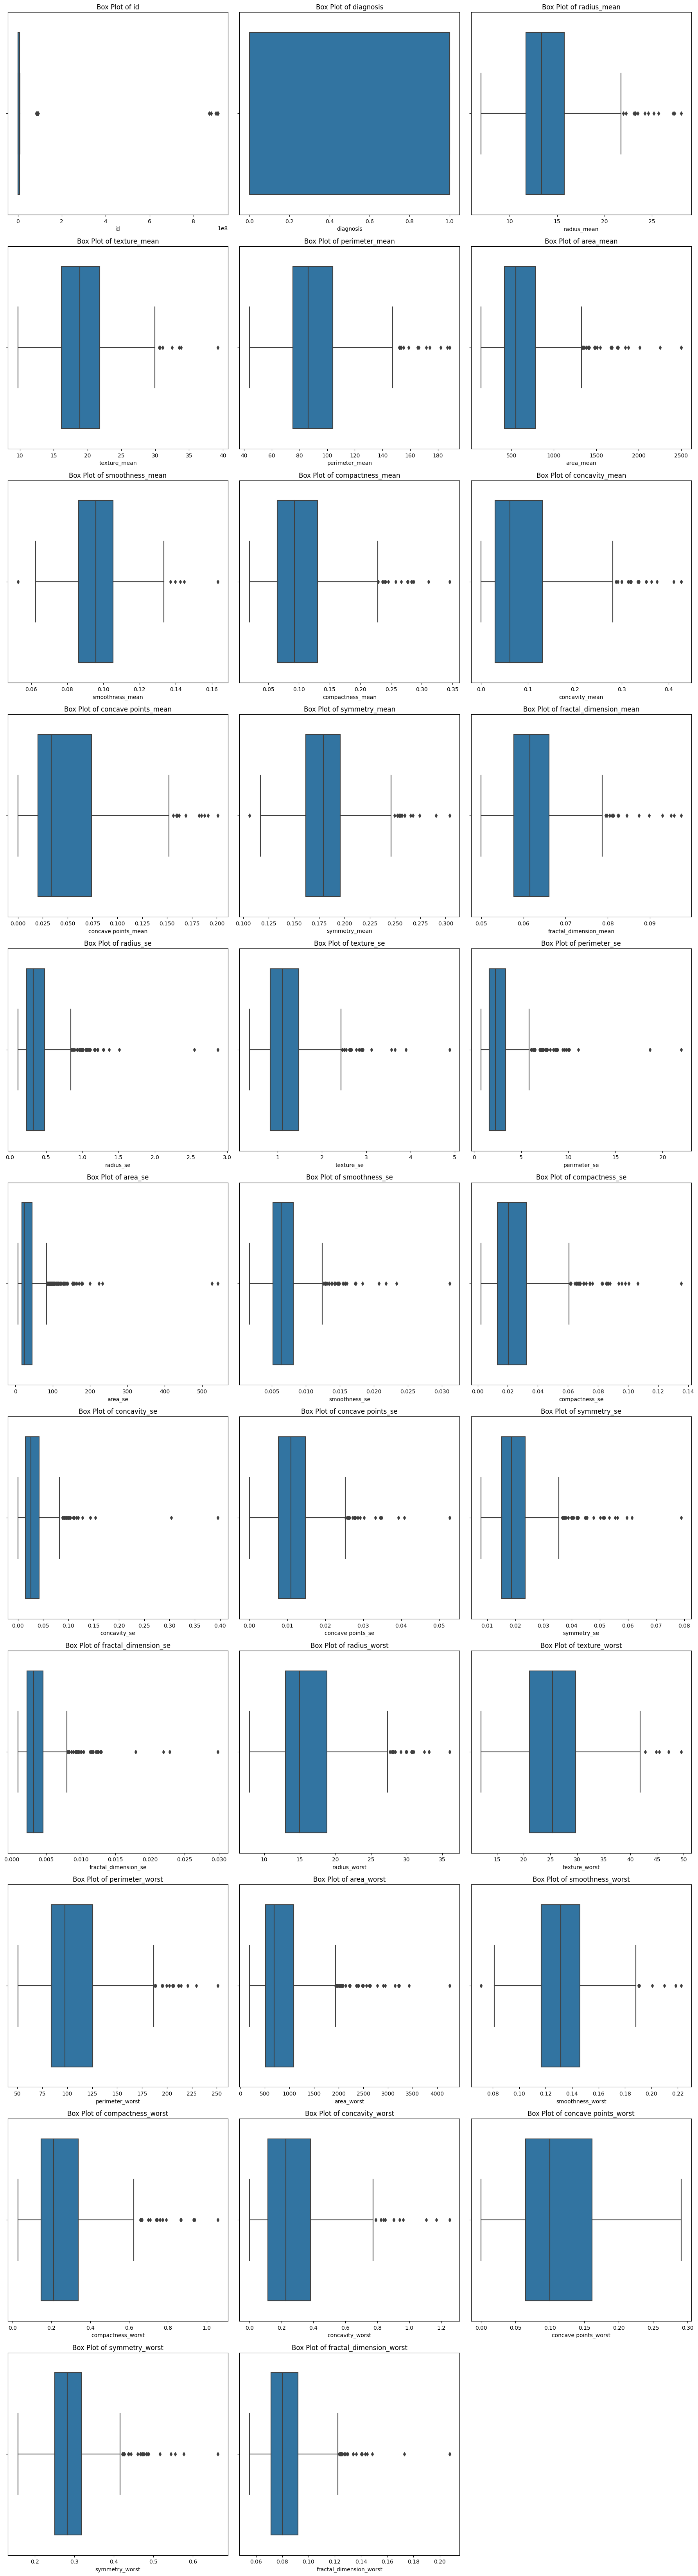

In [561]:
def numerical_boxplots(data):
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    num_plots = len(numerical_columns)
    num_rows = (num_plots + 2) // 3

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.ravel()  # Flatten the 2D array of axes

    for i, column in enumerate(numerical_columns):
        sns.boxplot(data=data, x=column, ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')
        # axes[i].set_ylabel(column)

    # Hide any empty subplots
    for i in range(num_plots, num_rows * 3):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


numerical_boxplots(df)


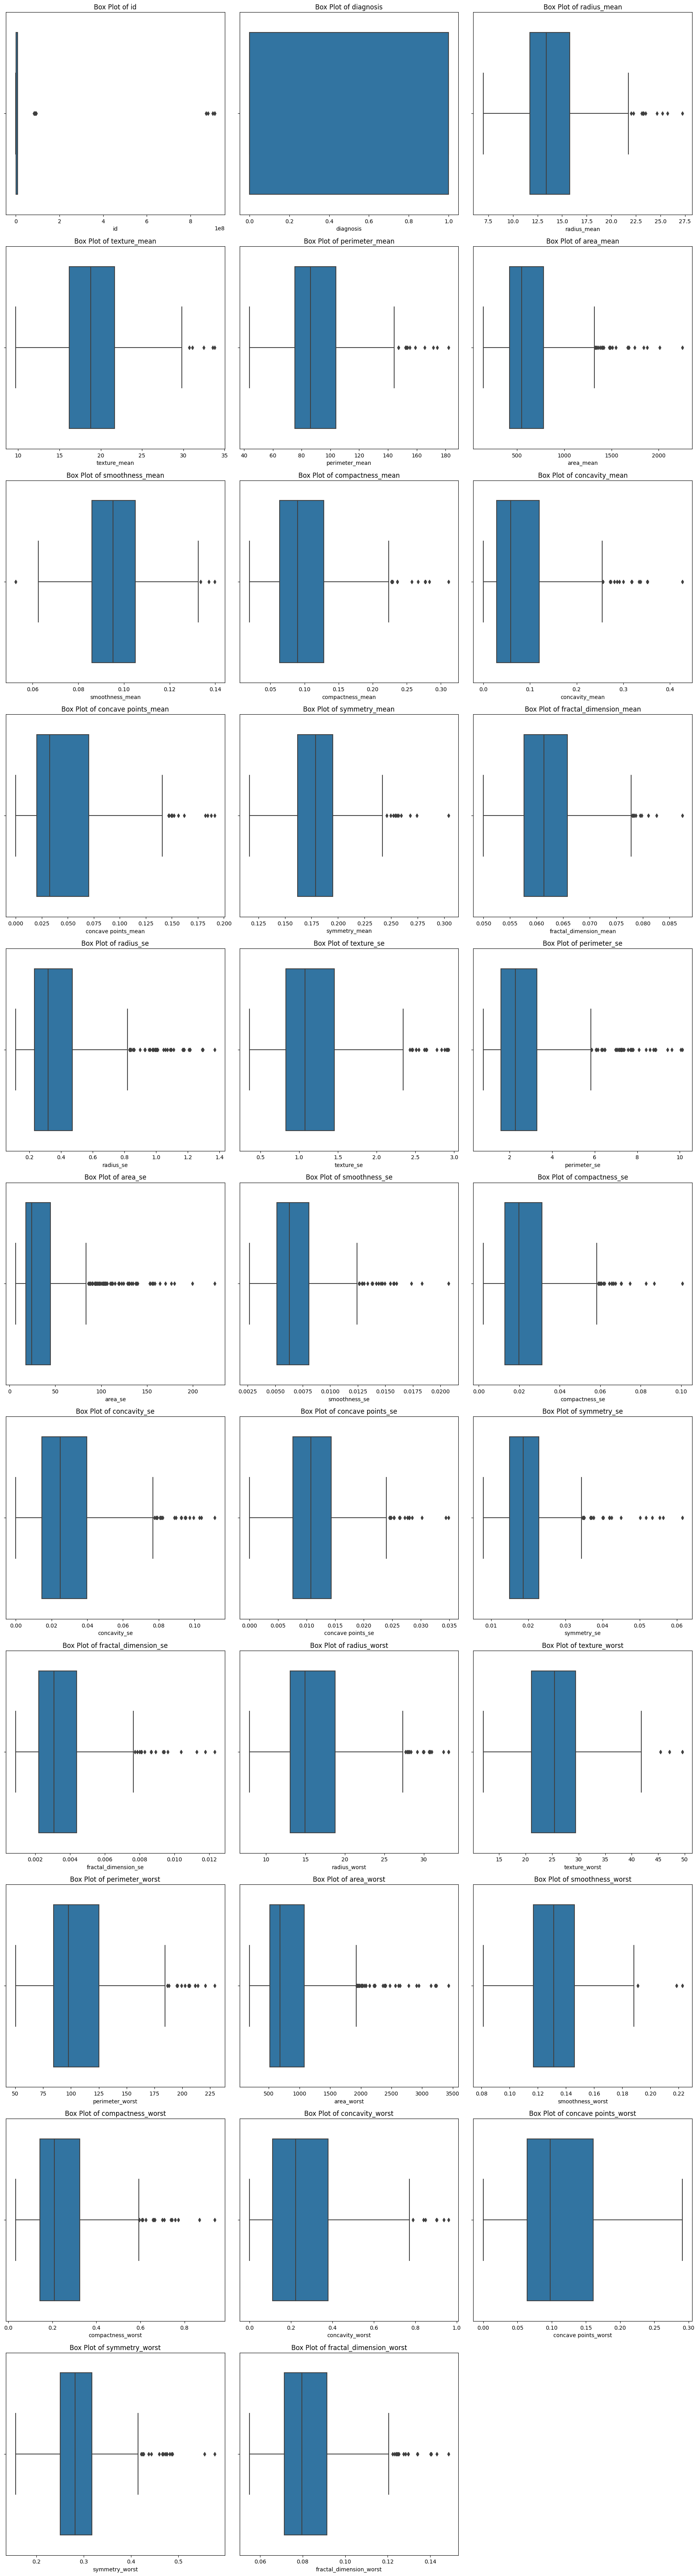

In [562]:
df = df[~((df['texture_mean']>35) | (df['smoothness_mean']>0.16) | (df['radius_se']>1.5) | (df['fractal_dimension_worst']>0.16))]
df = df[~((df['texture_se']>3) | (df['smoothness_se']>0.025) | (df['compactness_se']>0.12) | (df['concavity_se']>0.2))]
df = df[~((df['fractal_dimension_se']>0.015) | (df['concavity_worst']>1))]
df = df[~((df['fractal_dimension_mean']>0.09) | (df['concavity_se']>0.12) | (df['symmetry_se']>0.07))]
numerical_boxplots(df)

# EDA

In [563]:
Y = df['diagnosis']
X = df.drop(columns=['diagnosis', 'id'])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=10, stratify= Y)

In [564]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [565]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [566]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [567]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


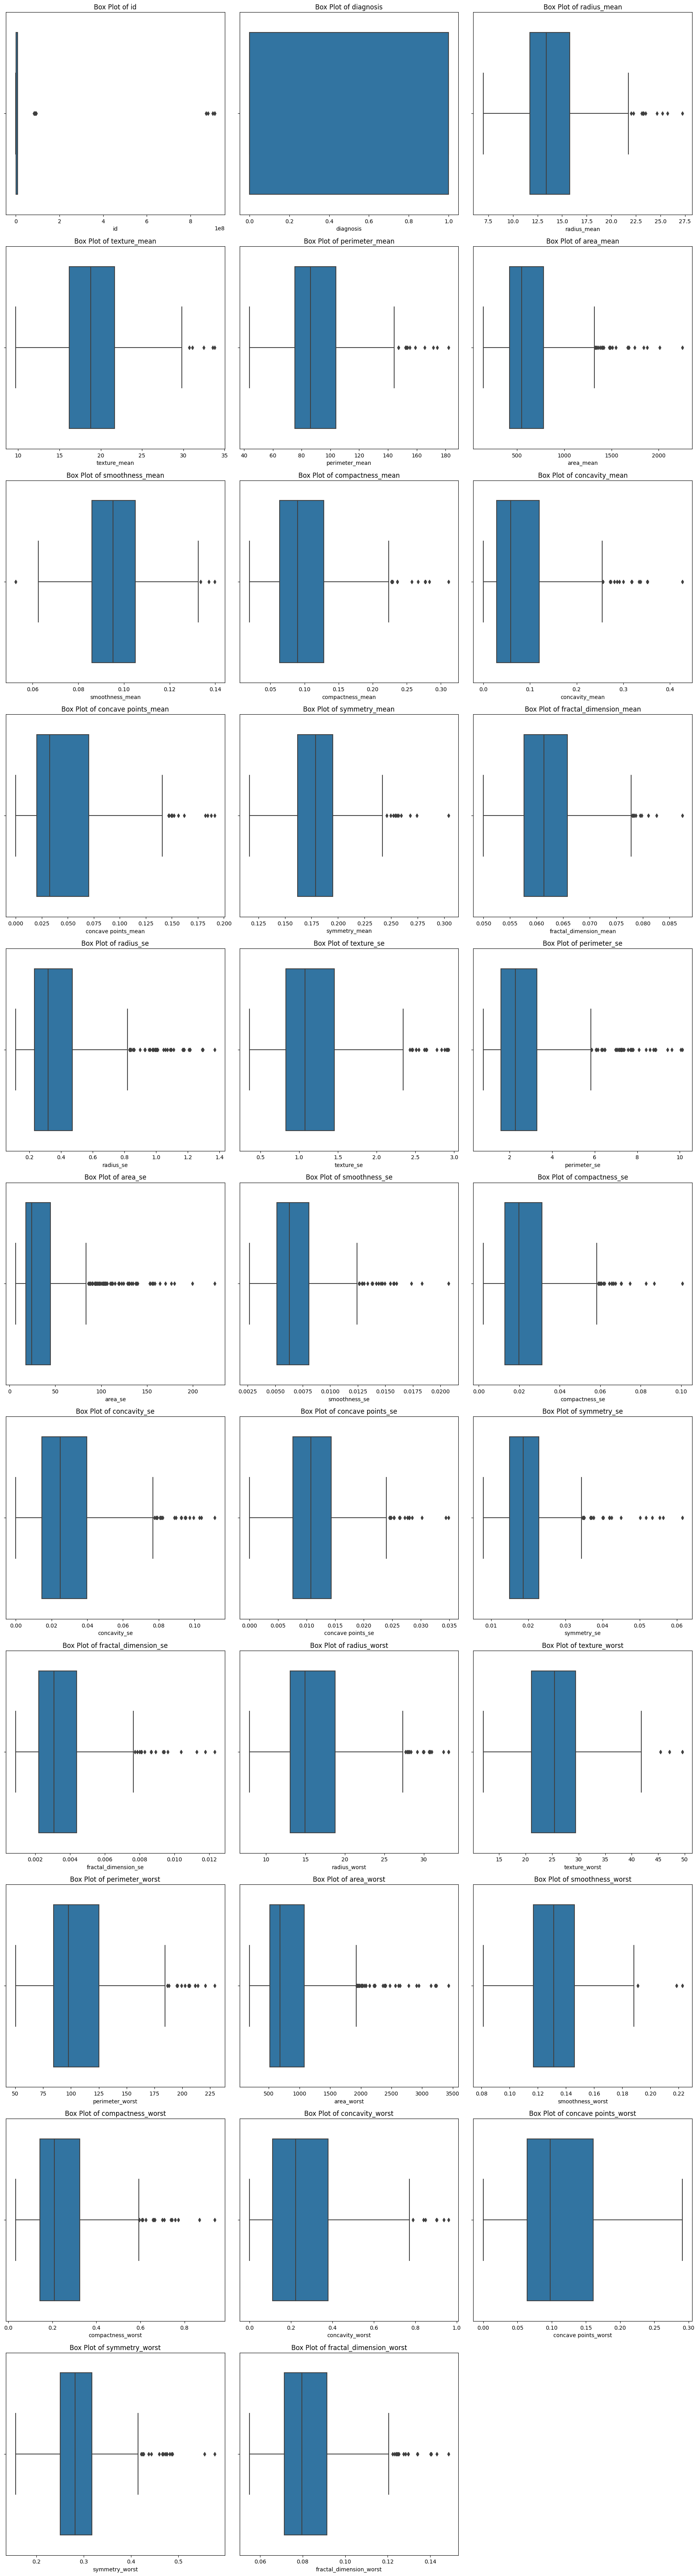

In [568]:
def numerical_boxplots(data):
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    num_plots = len(numerical_columns)
    num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.ravel()  # Flatten the 2D array of axes

    for i, column in enumerate(numerical_columns):
        sns.boxplot(data=data, x=column, ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')
        # axes[i].set_ylabel(column)

    # Hide any empty subplots
    for i in range(num_plots, num_rows * 3):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame 'df'
numerical_boxplots(df)


In [569]:
pipe_iter_robust = Pipeline([('iter_imp',IterativeImputer()), ('robust', RobustScaler())])
# pipe_iter_bin_one = Pipeline([('iter_imp',IterativeImputer()), ('bin_one', KBinsDiscretizer(strategy='uniform', n_bins= 5, encode='onehot'))])
# pipe_iter_bin_or = Pipeline([('iter_imp',IterativeImputer()), ('bin_one', KBinsDiscretizer(strategy='uniform', n_bins= 5, encode='ordinal'))])

# pipe_mode_onehot = Pipeline([('mode',SimpleImputer(strategy='most_frequent')), ('onehot',OneHotEncoder())])
# pipe_mode_ordinal = Pipeline([('mode',SimpleImputer(strategy='most_frequent')), ('ordinal',OrdinalEncoder())])
# pipe_mode_binary = Pipeline([('mode',SimpleImputer(strategy='most_frequent')), ('binary',BinaryEncoder())])


transformer = ColumnTransformer([
    ('pipe_iter_robust',pipe_iter_robust,(X_train.columns)),
    # ('pipe_iter_bin_one',pipe_iter_bin_one,['']),
    # ('pipe_iter_bin_or',pipe_iter_bin_or,['']),
    # ('pipe_mode_onehot',pipe_mode_onehot,['']),
    # ('pipe_mode_ordinal',pipe_mode_ordinal,['']),
    # ('pipe_mode_binary',pipe_mode_binary,[''])
    ], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_iter_robust',
                                 Pipeline(steps=[('iter_imp',
                                                  IterativeImputer()),
                                                 ('robust', RobustScaler())]),
                                 Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object'))])

# Modeling

   PolynomialDegree  max_depth  train_accuracy  test_accuracy
1                 0          3        0.981675       0.926829
2                 0          5        0.994764       0.926829


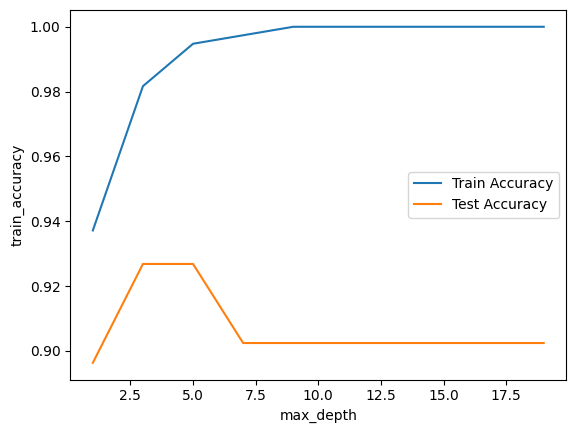

In [570]:
polynomial_feature = 'PolynomialDegree'
model_tuning = 'max_depth'
df_acc = pd.DataFrame(columns=[polynomial_feature,model_tuning,'train_accuracy','test_accuracy'])

for polynomial_degree in range(1):
    # polyfeature = PolynomialFeatures(degree=polydegree)
    # transformer2 = ColumnTransformer([
    #     ('polyfeature',polyfeature,[''])
    #     ], remainder='passthrough')
    # transformer2

    for tuning in range (1,20,2):
        # model = Lasso(alpha=tuning)
        # model = Ridge(alpha=tuning)
        # model = LogisticRegression(random_state=10)
        # model = KNeighborsClassifier(n_neighbors=tuning)
        model = DecisionTreeClassifier(random_state=10, max_depth=tuning)
        
        pipe_model = Pipeline([
            ('preprocessing', transformer),
            # ('polyfeature', transformer2),
            ('modeling', model)
            ])
        pipe_model.fit(X_train, Y_train)
        Y_train_predict = pipe_model.predict(X_train)
        Y_test_predict = pipe_model.predict(X_test)
        df_acc.loc[len(df_acc)] = {
            polynomial_feature: polynomial_degree,
            model_tuning: tuning,
            'train_accuracy': accuracy_score(Y_train, Y_train_predict),
            'test_accuracy': accuracy_score(Y_test, Y_test_predict)}

print(df_acc[df_acc['test_accuracy']==df_acc['test_accuracy'].max()])
# sns.lineplot(data=df_acc, x=polynomial_feature, y='train_accuracy', label='Train Accuracy')
# sns.lineplot(data=df_acc, x=polynomial_feature, y='test_accuracy', label='Test Accuracy')
sns.lineplot(data=df_acc, x=model_tuning, y='train_accuracy', label='Train Accuracy')
sns.lineplot(data=df_acc, x=model_tuning, y='test_accuracy', label='Test Accuracy')
plt.show()

# Modeling after Tuning

In [571]:
transformer.fit(X_train)
X_train2 = transformer.transform(X_train)
X_test2 = transformer.transform(X_test) 

model = DecisionTreeClassifier(random_state=10, max_depth=3)
model.fit(X_train2, Y_train)
Y_train_predict = model.predict(X_train2)
Y_test_predict = model.predict(X_test2)
print(f'Train Accuracy: {accuracy_score(Y_train, Y_train_predict)}')
print(f'Test Accuracy: {accuracy_score(Y_test, Y_test_predict)}')

all_features=[]
for i in range(1):
    all_features += list(transformer.transformers_[i][1].get_feature_names_out())
X_train2 = pd.DataFrame(data=X_train2, columns=all_features)
X_test2 = pd.DataFrame(data=X_test2, columns=all_features)

Train Accuracy: 0.981675392670157
Test Accuracy: 0.926829268292683


In [572]:
n_features = 10
important_features = pd.DataFrame({'features':all_features, 'importance':model.feature_importances_}).sort_values(by='importance', ascending=False).head(n_features)
important_features

,features,importance
20,radius_worst,0.807207
27,concave points_worst,0.120408
26,concavity_worst,0.029370
1,texture_mean,0.016181
24,smoothness_worst,0.014993
12,perimeter_se,0.011840
0,radius_mean,0.000000
16,concavity_se,0.000000
28,symmetry_worst,0.000000
25,compactness_worst,0.000000


In [573]:
n_features = 2
important_features = pd.DataFrame({'features':all_features, 'importance':model.feature_importances_}).sort_values(by='importance', ascending=False).head(n_features)
important_features

,features,importance
20,radius_worst,0.807207
27,concave points_worst,0.120408


In [574]:
columns_to_drop = [col for col in X_train2.columns if col not in list(important_features['features'])]
X_train2_drop =X_train2.drop(columns=columns_to_drop)
X_test2_drop =X_test2.drop(columns=columns_to_drop)

transformer_drop = ColumnTransformer([
    ('pipe_iter_robust',pipe_iter_robust,(X_train2_drop.columns))
    ], remainder='passthrough')

transformer_drop.fit(X_train2_drop)
X_train2_drop = transformer_drop.transform(X_train2_drop)
X_test2_drop = transformer_drop.transform(X_test2_drop)

model_drop = DecisionTreeClassifier(random_state=10, max_depth=3)
model_drop.fit(X_train2_drop, Y_train)
Y_train_predict = model_drop.predict(X_train2_drop)
Y_test_predict = model_drop.predict(X_test2_drop)
print(f'Train Accuracy: {accuracy_score(Y_train, Y_train_predict)}')
print(f'Test Accuracy: {accuracy_score(Y_test, Y_test_predict)}')

Train Accuracy: 0.9685863874345549
Test Accuracy: 0.9146341463414634
